<a href="https://colab.research.google.com/github/aboelela924/Mastering-Computer-vision-with-TensorFlow-2/blob/master/Mastering_Computer_vision_with_TensorFlow_2_Chapter_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np 
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
face_cascade = cv2.CascadeClassifier("/content/drive/My Drive/saved_models/harrCascade/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("/content/drive/My Drive/saved_models/harrCascade/haarcascade_eye.xml")

In [ ]:
def detect_face(img):
    new_img = img.copy()
    face_rects = face_cascade.detectMultiScale(new_img, 1.2, 5)
    for x, y, w, h in face_rects:
        cv2.rectangle(new_img, (x,y), (x+w, y+h), (255,0,0),3)
    return new_img

In [ ]:
def detect_eyes(img):
    new_img = img.copy()
    eyes_cords = eye_cascade.detectMultiScale(new_img, 1.4, 5)
    for x, y, w, h in eyes_cords:
        cv2.rectangle(new_img, (x,y), (x+w, y+h), (255,0,0),3)
    return new_img

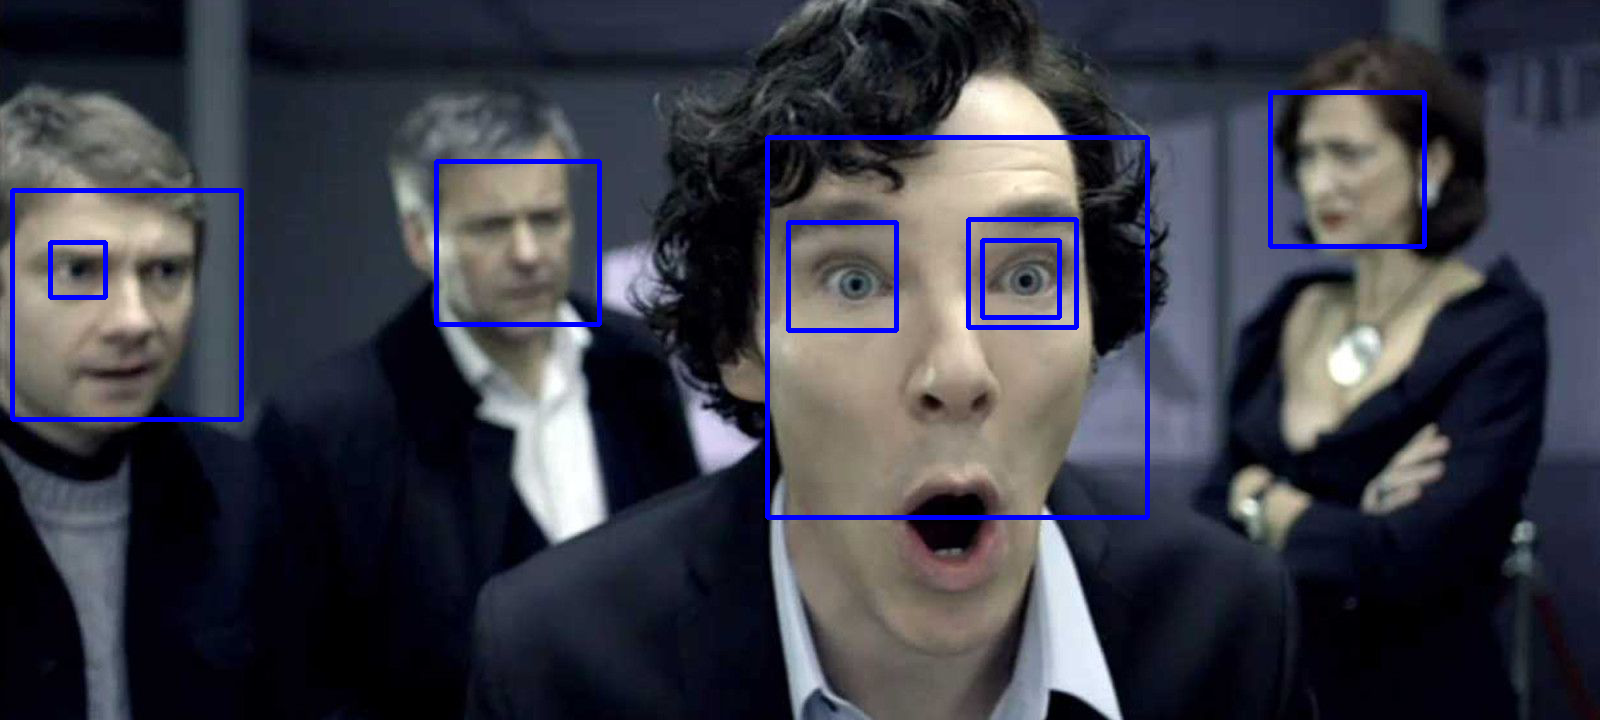

In [ ]:
image = cv2.imread("/content/testImages/Untitled 0048.png")
image_with_faces = detect_face(image)
cv2_imshow(detect_eyes(image_with_faces))

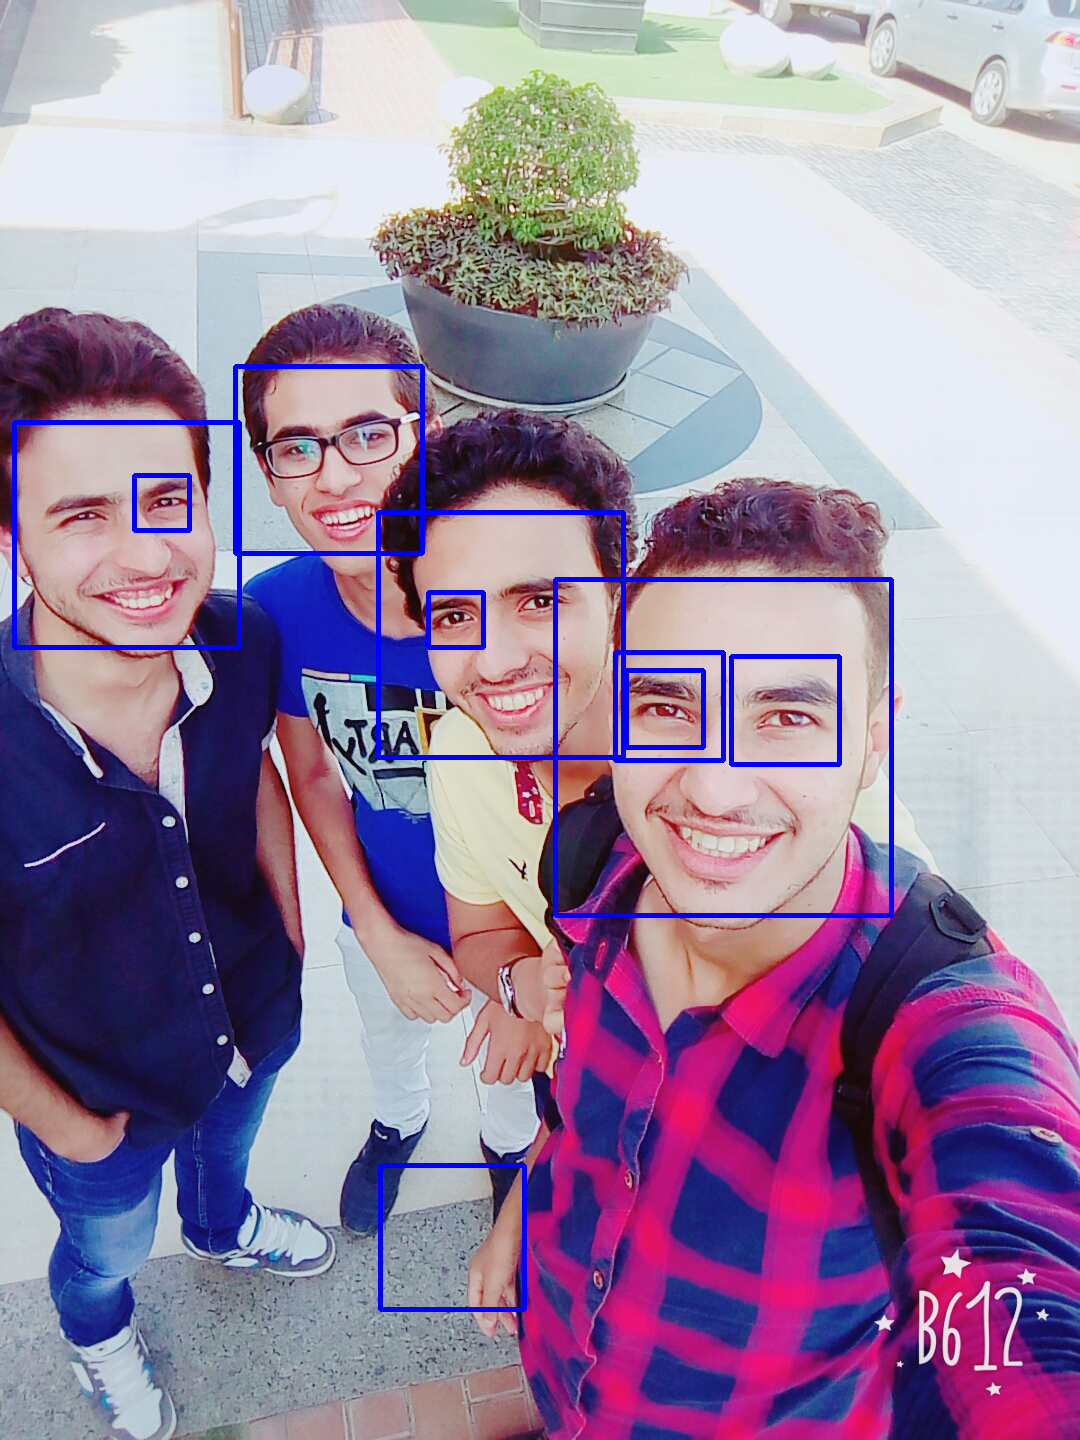

In [ ]:
image2 = cv2.imread("/content/testImages/B612_20170704_154658.jpg")
image_with_faces2 = detect_face(image2)
cv2_imshow(detect_eyes(image_with_faces2))

<h1>Facial Key poinr detection</h1>

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
! pip install -q kaggle

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"ahmedaboelela924","key":"7c73978cdcb61dc55774f91fed7be80d"}'}

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle competitions download -c facial-keypoints-detection

  0% 0.00/201k [00:00<?, ?B/s]
100% 201k/201k [00:00<00:00, 56.1MB/s]
  0% 0.00/843k [00:00<?, ?B/s]
100% 843k/843k [00:00<00:00, 56.9MB/s]
 56% 9.00M/16.0M [00:00<00:00, 19.3MB/s]
100% 16.0M/16.0M [00:00<00:00, 29.7MB/s]
 55% 33.0M/60.1M [00:00<00:00, 38.7MB/s]
100% 60.1M/60.1M [00:00<00:00, 82.3MB/s]


In [8]:
! mkdir train
! mkdir test

In [9]:
! unzip /content/training.zip -d train
! unzip /content/test.zip -d test

Archive:  /content/training.zip
  inflating: train/training.csv      
Archive:  /content/test.zip
  inflating: test/test.csv           


In [5]:
import numpy as np 
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os

In [6]:
train_data = pd.read_csv("/content/train/training.csv")
test_data = pd.read_csv("/content/test/test.csv")

In [7]:
train_data = train_data.dropna()
test_data = test_data.dropna()

In [9]:
print(train_data.keys())

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y', 'Image'],
      dtype='object')


In [10]:
print(test_data.keys())

Index(['ImageId', 'Image'], dtype='object')


In [13]:
train_images = train_data["Image"].apply(lambda image: np.array(image.split(" "), dtype=np.int32))
test_images = test_data["Image"].apply(lambda image: np.array(image.split(" "), dtype=np.int32))

In [14]:
training_features = train_data.drop("Image", axis=1)
train_labels_xdim = training_features.loc[:,["left_eye_center_x", "right_eye_center_x", "left_eye_inner_corner_x",
                                   "left_eye_outer_corner_x", "right_eye_inner_corner_x",
                                   "right_eye_outer_corner_x", "left_eyebrow_inner_end_x",
                                   "left_eyebrow_outer_end_x", "right_eyebrow_inner_end_x",
                                   "right_eyebrow_outer_end_x", "nose_tip_x", "mouth_left_corner_x", 
                                   "mouth_right_corner_x", "mouth_center_top_lip_x", 
                                   "mouth_center_bottom_lip_x"]].to_numpy()
train_labels_ydim = training_features.loc[:,["left_eye_center_y", "right_eye_center_y", "left_eye_inner_corner_y",
                                   "left_eye_outer_corner_y", "right_eye_inner_corner_y",
                                   "right_eye_outer_corner_y", "left_eyebrow_inner_end_y",
                                   "left_eyebrow_outer_end_y", "right_eyebrow_inner_end_y",
                                   "right_eyebrow_outer_end_y", "nose_tip_y", "mouth_left_corner_y", 
                                   "mouth_right_corner_y", "mouth_center_top_lip_y", 
                                   "mouth_center_bottom_lip_y"]].to_numpy()

In [15]:
IMG_HEIGHT = 96
IMG_WIDTH = 96
CHANNELS = 1

In [16]:
train_images_np = np.stack(train_images.to_numpy(), axis=0)
test_images_np = np.stack(test_images.to_numpy(), axis=0)

In [17]:
train_images_np = train_images_np.reshape(train_images_np.shape[0], IMG_WIDTH, IMG_HEIGHT)
test_images_np = test_images_np.reshape(test_images_np.shape[0], IMG_WIDTH, IMG_HEIGHT)

train_images_np = np.expand_dims(train_images_np, axis=3)
test_images_np = np.expand_dims(test_images_np, axis=3)

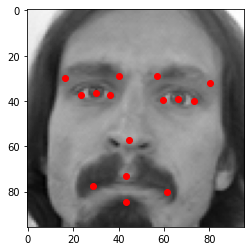

In [18]:
plt.imshow(np.squeeze(train_images_np[0]), cmap="gray")
plt.scatter(train_labels_xdim[0], train_labels_ydim[0], color="red")
plt.show()

In [19]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3,3), activation="relu", padding="same", input_shape=(IMG_WIDTH, IMG_HEIGHT, CHANNELS)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(128, (3,3), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(256, (3,3), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(500, activation="relu"))
model.add(tf.keras.layers.Dense(30))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 128)       0

In [21]:
adam = tf.keras.optimizers.Adam()
model.compile(adam, loss="mean_squared_error", metrics=["accuracy"])

In [22]:
train_labels = np.hstack([train_labels_xdim, train_labels_ydim])

In [23]:
train_images_np = train_images_np.astype("float32")
train_images_np = (train_images_np - 127.5) / 127.5

test_images_np = test_images_np.astype(np.float32)
test_images_np = (test_images_np - 127.5) / 127.5

In [24]:
labels_max = np.max(train_labels)
labels_min = np.min(train_labels)
mean = (labels_max + labels_min) / 2
train_labels = (train_labels - mean)/mean

In [25]:
print(np.max(train_labels))
print(np.min(train_labels))

0.923194974246301
-0.9231949742463011


In [28]:
model.fit(train_images_np, train_labels, batch_size=128, epochs=50, validation_split=0.05)

Epoch 1/50
16/16 [==============================] - 1s 64ms/step - loss: 7.3860e-04 - accuracy: 0.8323 - val_loss: 0.0021 - val_accuracy: 0.5888
Epoch 2/50
16/16 [==============================] - 1s 38ms/step - loss: 7.1165e-04 - accuracy: 0.8273 - val_loss: 0.0021 - val_accuracy: 0.5701
Epoch 3/50
16/16 [==============================] - 1s 38ms/step - loss: 6.8650e-04 - accuracy: 0.8259 - val_loss: 0.0021 - val_accuracy: 0.5607
Epoch 4/50
16/16 [==============================] - 1s 38ms/step - loss: 6.6811e-04 - accuracy: 0.8347 - val_loss: 0.0021 - val_accuracy: 0.5514
Epoch 5/50
16/16 [==============================] - 1s 38ms/step - loss: 6.4610e-04 - accuracy: 0.8313 - val_loss: 0.0019 - val_accuracy: 0.6075
Epoch 6/50
16/16 [==============================] - 1s 38ms/step - loss: 6.5417e-04 - accuracy: 0.8451 - val_loss: 0.0019 - val_accuracy: 0.5607
Epoch 7/50
16/16 [==============================] - 1s 39ms/step - loss: 6.5908e-04 - accuracy: 0.8342 - val_loss: 0.0019 - val_ac

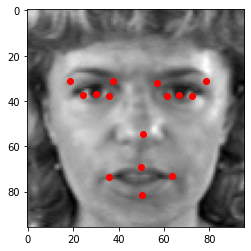

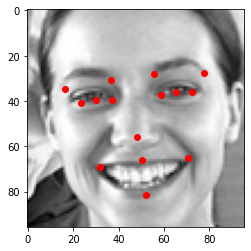

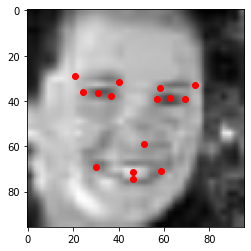

In [41]:
test_image = test_images_np[7]
points = model.predict(np.expand_dims(test_image, axis=0))
points = (points * mean) + mean
points_x = points[0,:15]
points_y = points[0,15:]
plt.imshow(np.squeeze(test_image), cmap="gray")
plt.scatter(points_x, points_y, color="red")
plt.show()

test_image = test_images_np[70]
points = model.predict(np.expand_dims(test_image, axis=0))
points = (points * mean) + mean
points_x = points[0,:15]
points_y = points[0,15:]
plt.imshow(np.squeeze(test_image), cmap="gray")
plt.scatter(points_x, points_y, color="red")
plt.show()

test_image = test_images_np[700]
points = model.predict(np.expand_dims(test_image, axis=0))
points = (points * mean) + mean
points_x = points[0,:15]
points_y = points[0,15:]
plt.imshow(np.squeeze(test_image), cmap="gray")
plt.scatter(points_x, points_y, color="red")
plt.show()